# Set Cover problem

In [52]:
from itertools import accumulate
import numpy as np
from tqdm.auto import tqdm
from matplotlib import pyplot as plt

from icecream import ic

UNIVERSE_SIZE = 10_000
NUM_SETS = 1_000
DENSITY = 0.2

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))


def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

## Fitness function

In [53]:
def fitness(solution):
    return (valid(solution), -cost(solution))

# Multiple Mutation Hill Climber

In [54]:
def tweak(solution):
    new_solution = solution.copy()
    index = None
    while index is None or np.random.random() < 0.5:
        index = np.random.randint(0, NUM_SETS)
        new_solution[index] = not new_solution[index]
    return new_solution

In [55]:
solution = rng.random(NUM_SETS) < 1
ic(valid(solution), cost(solution))
solution_fitness = fitness(solution)
history = [solution_fitness[1]]


for steps in range(10_000):
    # TWEAK
    temp = tweak(solution)
    f = fitness(temp)
    history.append(f[1])

    if f > solution_fitness:
        solution = temp
        solution_fitness = f
ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(4278194.008129566)
ic| valid(solution): np.True_
    cost(solution): np.float64(131026.24705414435)


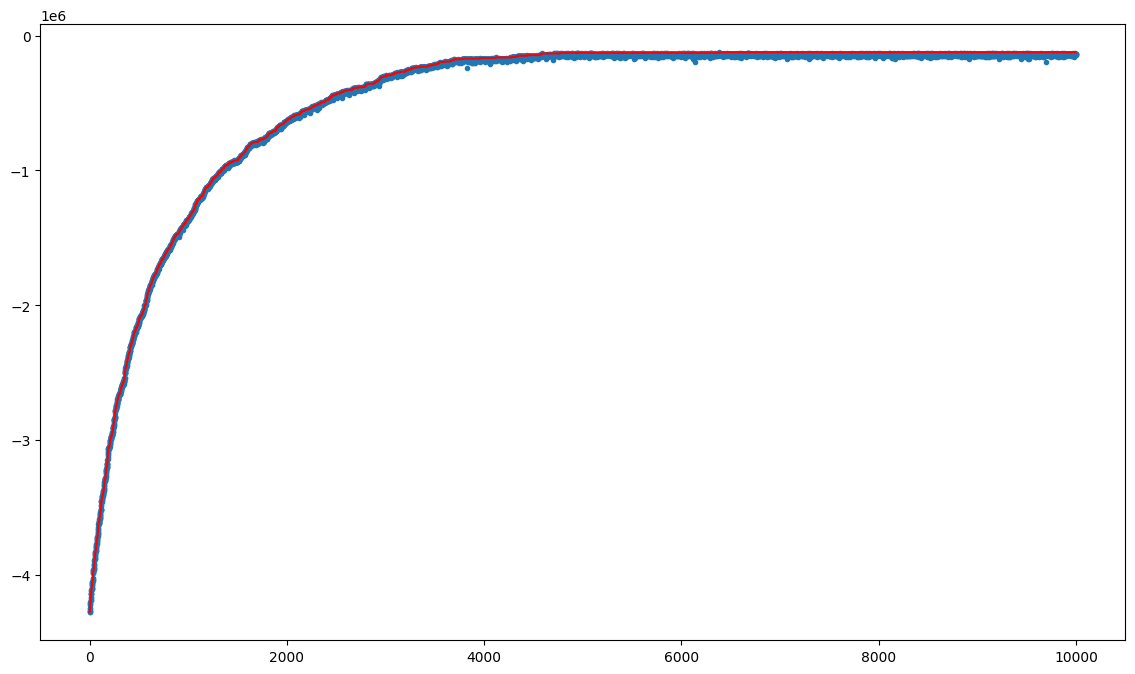

In [56]:
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")

# Improved Multiple Mutation Hill Climber

In [57]:
def tweak_strength(solution: np.ndarray, strength: float = 0.3) -> np.ndarray:
    mask = rng.random(NUM_SETS) < strength
    if not np.any(mask):
        mask[np.random.randint(NUM_SETS)] = True
    new_solution = np.logical_xor(solution, mask)
    return new_solution

In [61]:
solution = rng.random(NUM_SETS) < 0.3
BUFFER_SIZE = 13
solution_fitness = fitness(solution)
history = [float(solution_fitness[1])]
ic(valid(solution), cost(solution))

strength = 0.5
buffer = list()

for steps in range(10_000):
    new_solution = tweak_strength(solution, strength)
    f = fitness(new_solution)
    history.append(float(f[1]))
    buffer.append(f > solution_fitness)

    buffer = buffer[-BUFFER_SIZE:]
    if sum(buffer) > BUFFER_SIZE / 2:
        strength *= 1.2
    elif sum(buffer) < BUFFER_SIZE / 2:
        strength /= 1.2

    if (f > solution_fitness):
        solution = new_solution
        solution_fitness = fitness(solution)

ic(valid(solution), cost(solution))
None

ic| valid(solution): np.True_
    cost(solution): np.float64(1286693.1935049347)
ic| valid(solution): np.True_
    cost(solution): np.float64(136708.52333172696)


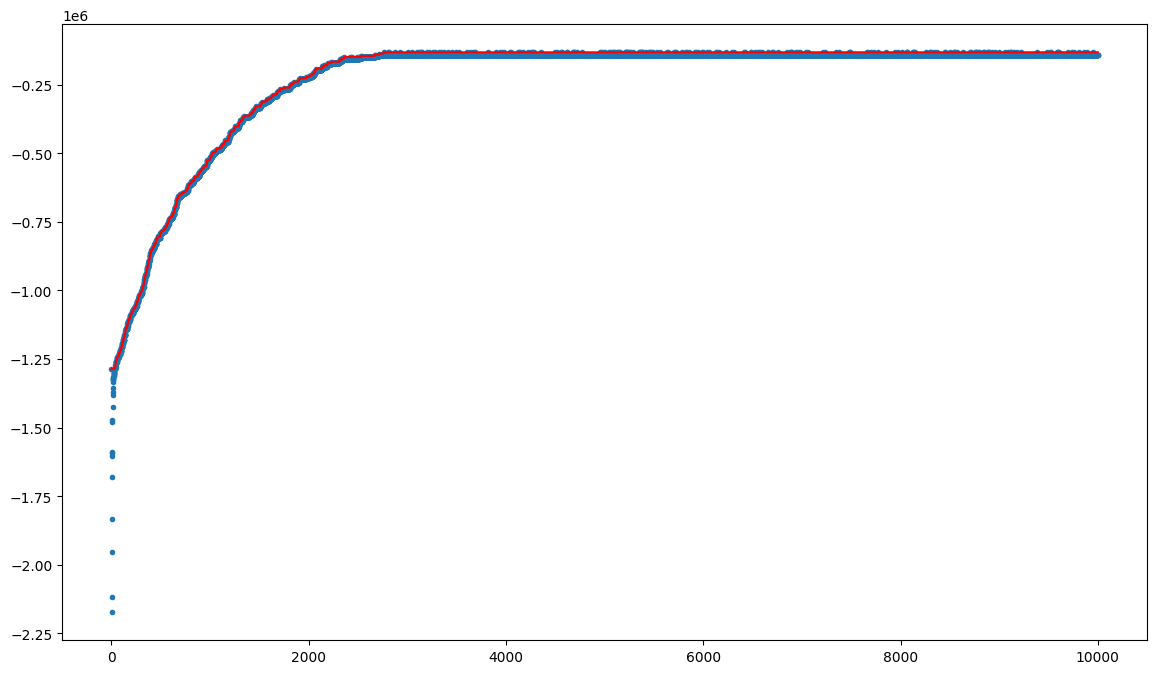

In [62]:
plt.figure(figsize=(14, 8))
plt.plot(
    range(len(history)),
    list(accumulate(history, max)),
    color="red",
)
_ = plt.scatter(range(len(history)), history, marker=".")